In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")

In [3]:
ID_COL = 'RespondentID'
GENDER_COL = 'Gender'
AGE_COL = 'Age'
INCOME_COL = 'Household Income'
EDU_COL = 'Education'
LOC_COL = 'Location (Census Region)'
SEEN_COL = 'Have you seen any of the 6 films in the Star Wars franchise?'
FAN_COL = 'Do you consider yourself to be a fan of the Star Wars film franchise?'
TREK_COL = 'Do you consider yourself to be a fan of the Star Trek franchise?'

EP1_COL = 'Which of the following Star Wars films have you seen? Please select all that apply.'
EP2_COL = 'Unnamed: 4'
EP3_COL = 'Unnamed: 5'
EP4_COL = 'Unnamed: 6'
EP5_COL = 'Unnamed: 7'
EP6_COL = 'Unnamed: 8'

In [4]:
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [5]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [6]:
# Explicitly setting copy here to let pandas know that it is OK 
# to set the value in the copy. We are not interested in the earlier
# Dataframe star_wars where the ID_COL had null values. From here on
# we are only interested in the Dataframe with the rows that have 
# non-null values for the ID_COL. 
#
# We will modify that Dataframe further down and don't want pandas 
# throwing SettignWithCopyWarning errors. Hence, explicitly tell 
# pandas to create a copy, eventhough it will anyway create a copy
# when we index it. Making it explicit helps pandas understand that
# we intended it that way
star_wars = star_wars[star_wars[ID_COL].notnull()].copy()

In [7]:
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Han,No,NaN,No,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,Yes,No,NaN,Star Wars: Episode II Attack of the Clones,NaN,NaN,NaN,NaN,1,...,Very favorably,I don't understand this question,No,NaN,No,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,

In [8]:
yes_no = {
    'Yes': True,
    'YES': True,
    'yes': True,
    'No': False,
    'NO': False,
    'no': False,
    True: True,
    False: False
}

In [9]:
star_wars[SEEN_COL]

1       Yes
2        No
3       Yes
4       Yes
5       Yes
6       Yes
7       Yes
8       Yes
9       Yes
10      Yes
11      Yes
12       No
13      Yes
14      Yes
15      Yes
16      Yes
17      Yes
18      Yes
19      Yes
20      Yes
21      Yes
22      Yes
23      Yes
24      Yes
25      Yes
26       No
27      Yes
28      Yes
29      Yes
30      Yes
       ... 
1157    Yes
1158     No
1159    Yes
1160     No
1161    Yes
1162    Yes
1163    Yes
1164    Yes
1165    Yes
1166    Yes
1167    Yes
1168    Yes
1169     No
1170    Yes
1171     No
1172    Yes
1173    Yes
1174    Yes
1175    Yes
1176    Yes
1177    Yes
1178    Yes
1179     No
1180    Yes
1181    Yes
1182    Yes
1183    Yes
1184     No
1185    Yes
1186    Yes
Name: Have you seen any of the 6 films in the Star Wars franchise?, Length: 1186, dtype: object

In [10]:
star_wars[SEEN_COL] = star_wars[SEEN_COL].map(yes_no)

In [11]:
star_wars[FAN_COL]

1       Yes
2       NaN
3        No
4       Yes
5       Yes
6       Yes
7       Yes
8       Yes
9       Yes
10       No
11      NaN
12      NaN
13       No
14      Yes
15      Yes
16      Yes
17      Yes
18      Yes
19      Yes
20      Yes
21      Yes
22       No
23      Yes
24      Yes
25      Yes
26      NaN
27      Yes
28      Yes
29      Yes
30      Yes
       ... 
1157     No
1158    NaN
1159     No
1160    NaN
1161     No
1162     No
1163    Yes
1164     No
1165     No
1166    Yes
1167    Yes
1168     No
1169    NaN
1170    Yes
1171    NaN
1172    Yes
1173    Yes
1174    Yes
1175     No
1176    Yes
1177     No
1178     No
1179    NaN
1180    Yes
1181    Yes
1182    Yes
1183    Yes
1184    NaN
1185    Yes
1186     No
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, Length: 1186, dtype: object

In [12]:
star_wars[FAN_COL] = star_wars[FAN_COL].map(yes_no)

In [13]:
star_wars[TREK_COL]

1        No
2       Yes
3        No
4       Yes
5        No
6       Yes
7        No
8       Yes
9        No
10       No
11      NaN
12      NaN
13       No
14       No
15       No
16      Yes
17       No
18       No
19       No
20      Yes
21       No
22       No
23      Yes
24       No
25       No
26      Yes
27       No
28       No
29       No
30      Yes
       ... 
1157     No
1158     No
1159     No
1160     No
1161     No
1162     No
1163     No
1164     No
1165     No
1166    Yes
1167     No
1168     No
1169     No
1170    Yes
1171     No
1172    Yes
1173    Yes
1174    Yes
1175    Yes
1176    Yes
1177     No
1178    Yes
1179     No
1180    Yes
1181     No
1182    Yes
1183    Yes
1184     No
1185    Yes
1186     No
Name: Do you consider yourself to be a fan of the Star Trek franchise?, Length: 1186, dtype: object

In [14]:
star_wars[TREK_COL] = star_wars[TREK_COL].map(yes_no)

In [15]:
star_wars[[SEEN_COL, FAN_COL, TREK_COL]]

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Do you consider yourself to be a fan of the Star Trek franchise?
1,True,True,False
2,False,NaN,True
3,True,False,False
4,True,True,True
5,True,True,False
6,True,True,True
7,True,True,False
8,True,True,True
9,True,True,False
10,True,False,False


In [16]:
def check_watched_movie(ele):
    if isinstance(ele, pd.Series): 
        return ele.apply(check_watched_movie)
    
    if ele is np.NaN:
        return False
    else:
        return True

In [17]:
star_wars[star_wars.columns[3:9]] = star_wars[star_wars.columns[3:9]].apply(check_watched_movie, axis=0)

In [18]:
def find_seen_col_name(col):
    if col in star_wars.columns[3:9].tolist():
        return 'seen_{}'.format(star_wars.columns[3:9].tolist().index(col))
    else:
        return col

In [19]:
star_wars.rename(columns=find_seen_col_name, inplace=True)

In [20]:
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_0,seen_1,seen_2,seen_3,seen_4,seen_5,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,...,Very favorably,I don't understand this question,No,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Greedo,Yes,No,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1,...,Very favorably,Han,Yes,No,True,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6,...,Very favorably,Han,Yes,No,False,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4,...,Very favorably,Han,No,NaN,True,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5,...,Somewhat favorably,Han,No,NaN,False,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1,...,Very favorably,I don't understand this question,No,NaN,False,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


In [21]:
EP1_COL = 'seen_1'
EP2_COL = 'seen_2'
EP3_COL = 'seen_3'
EP4_COL = 'seen_4'
EP5_COL = 'seen_5'
EP6_COL = 'seen_6'

In [22]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

In [23]:
def find_ranking_col_name(col):
    if col in star_wars.columns[9:15].tolist():
        return 'ranking_{}'.format(star_wars.columns[9:15].tolist().index(col))
    else:
        return col

In [24]:
star_wars.rename(columns=find_ranking_col_name, inplace=True)

In [25]:
star_wars

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_0,seen_1,seen_2,seen_3,seen_4,seen_5,ranking_0,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,...,Very favorably,I don't understand this question,Yes,No,False,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,True,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,...,Unfamiliar (N/A),I don't understand this question,No,NaN,False,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,...,Very favorably,I don't understand this question,No,NaN,True,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Greedo,Yes,No,False,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,True,True,True,True,True,True,True,True,1.0,...,Very favorably,Han,Yes,No,True,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,True,True,True,True,True,True,True,True,6.0,...,Very favorably,Han,Yes,No,False,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,True,True,True,True,True,True,True,True,4.0,...,Very favorably,Han,No,NaN,True,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,True,True,True,True,True,True,True,True,5.0,...,Somewhat favorably,Han,No,NaN,False,Male,18-29,"$0 - $24,999",Some college or Associate degree,South Atlantic
10,3.292640e+09,True,False,False,True,False,False,False,False,1.0,...,Very favorably,I don't understand this question,No,NaN,False,Male,18-29,"$25,000 - $49,999",Some college or Associate degree,Pacific


### The Story so far

What we have done till now is basically data-cleaning. We have transformed the data to a format that lends itself more to analysis than the format it was in originally.

- We eliminated rows that had spurious values for the Respondent Id; without valid values for the Respondent Id it is safe to assume that the data in those rows was suspect
- We then modified the values in certain columns to use Boolean values -- this would allow us to summarize the data in these columns much more easily
- Finally we renamed a few columns of the dataset to use smaller, and more meaningful, names


### Analysis

We first plot the rankings of the various Star Wars movies. For this, we derive the mean ranking for each movie provided by the Audience. The lower the rank, the better the movie. (Rank 1 is rated higher than Rank 6)

When we derive the mean, this fact remains unchanged.

In [26]:
seen_cols = star_wars.columns[3:9]
ranking_cols = star_wars.columns[9:15]

def analyze_ranking(data):
    fig, ax = plt.subplots()
    mean_ranking = data[ranking_cols].mean()
    
    print(mean_ranking)
    
    mean_ranking.plot(kind='bar', ax=ax)
    
    return mean_ranking
    
def analyze_seen(data):
    fig, ax = plt.subplots()
    seen = data[seen_cols].sum()
    
    print(seen)
    
    seen.plot(kind='bar', ax=ax)
    return seen

def rename_index(x):
    return x.split('_')[1]

def compare_ranking_with_audience(seen, ranking):
    fig, ax = plt.subplots()
    set = pd.DataFrame()
    set['seen']= seen.rename(index=rename_index)
    set['ranking'] = ranking.rename(index=rename_index)
    
    print(set)
    
    set.plot(kind='scatter', x='seen', y='ranking', ax=ax)
    
def analyze_data(data):
    ranking = analyze_ranking(data)
    seen = analyze_seen(data)
    compare_ranking_with_audience(seen, ranking)

ranking_0    3.732934
ranking_1    4.087321
ranking_2    4.341317
ranking_3    3.272727
ranking_4    2.513158
ranking_5    3.047847
dtype: float64
seen_0    673
seen_1    571
seen_2    550
seen_3    607
seen_4    758
seen_5    738
dtype: int64
   seen   ranking
0   673  3.732934
1   571  4.087321
2   550  4.341317
3   607  3.272727
4   758  2.513158
5   738  3.047847


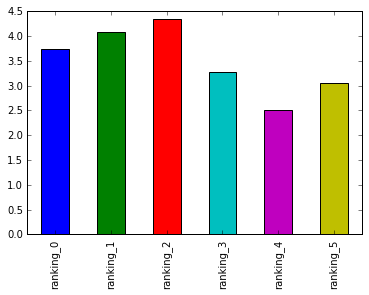

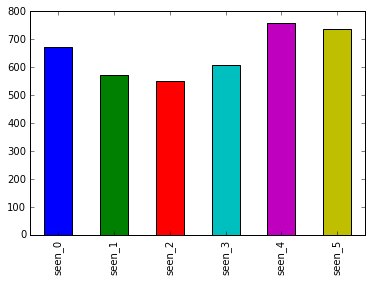

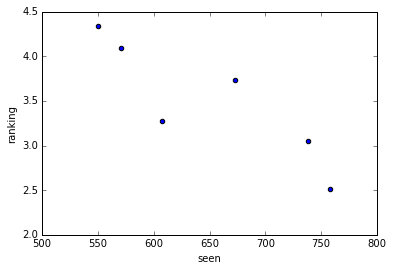

In [27]:
analyze_data(star_wars)

From the above bar plot, it can be easily seen that ranking_4, or the ranking for the 5th movie in the series, which is the ranking for **Episode V: The Empire Strikes Back** is the lowest.

We can clearly see that there is a fair negative correlation between the number of respondents who have viewed a movie and the ranking it has received.

This in effect actually tells us that the more number of people who have watched the movie, the higher it is ranked (remember that a lower ranking means it is ranked higher).

This largely makes sense. Typically movie audience is driven by word-of-mouth and reviews. Hence, when people actually watch and like a movie, its popularity increase and more people actually go and watch it. Conversely when a movie doesn't receive very good reviews, that discourages other people from watching it.

### Analyzing by Groups

We now try to analyze the data based on groups of audience.

#### Male vs Female

In [28]:
male_set = star_wars[star_wars[GENDER_COL] == 'Male']
female_set = star_wars[star_wars[GENDER_COL] == 'Female']

ranking_0    4.037825
ranking_1    4.224586
ranking_2    4.274882
ranking_3    2.997636
ranking_4    2.458629
ranking_5    3.002364
dtype: float64
seen_0    361
seen_1    323
seen_2    317
seen_3    342
seen_4    392
seen_5    387
dtype: int64
   seen   ranking
0   361  4.037825
1   323  4.224586
2   317  4.274882
3   342  2.997636
4   392  2.458629
5   387  3.002364


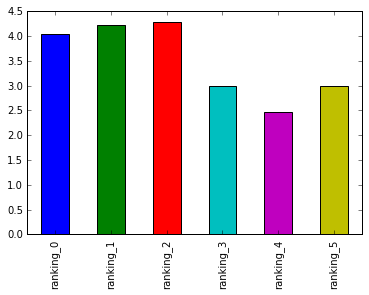

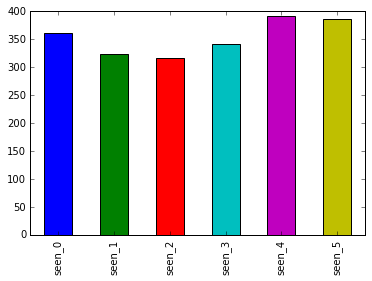

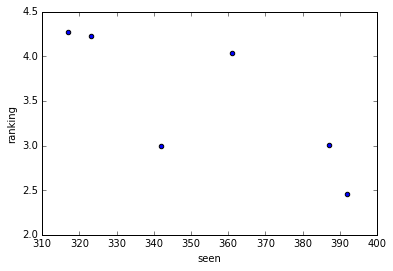

In [29]:
analyze_data(male_set)

ranking_0    3.429293
ranking_1    3.954660
ranking_2    4.418136
ranking_3    3.544081
ranking_4    2.569270
ranking_5    3.078086
dtype: float64
seen_0    298
seen_1    237
seen_2    222
seen_3    255
seen_4    353
seen_5    338
dtype: int64
   seen   ranking
0   298  3.429293
1   237  3.954660
2   222  4.418136
3   255  3.544081
4   353  2.569270
5   338  3.078086


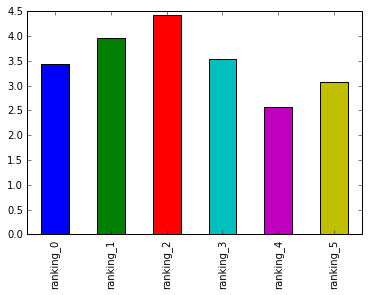

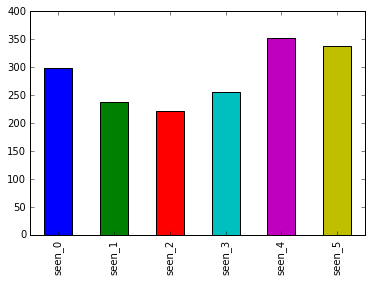

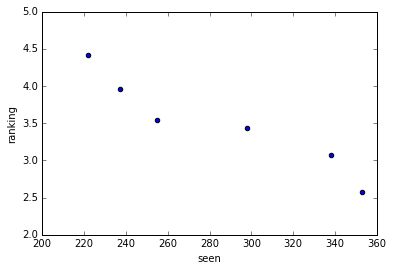

In [30]:
analyze_data(female_set)

#### Star Wars Fans vs Non-Fans

In [34]:
fans_set = star_wars[star_wars[FAN_COL] == True]
not_fans_set = star_wars[star_wars[FAN_COL] == False]

ranking_0    4.141304
ranking_1    4.342391
ranking_2    4.417423
ranking_3    2.932971
ranking_4    2.333333
ranking_5    2.829710
dtype: float64
seen_0    500
seen_1    463
seen_2    450
seen_3    483
seen_4    538
seen_5    537
dtype: int64
   seen   ranking
0   500  4.141304
1   463  4.342391
2   450  4.417423
3   483  2.932971
4   538  2.333333
5   537  2.829710


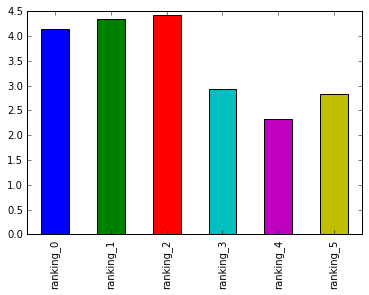

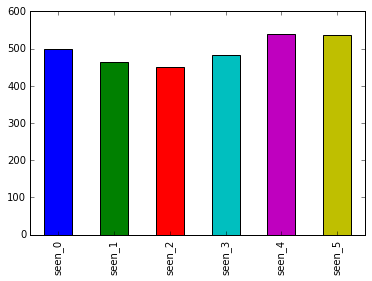

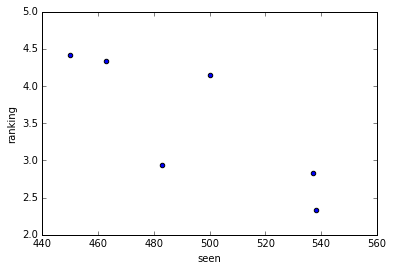

In [35]:
analyze_data(fans_set)

ranking_0    2.936396
ranking_1    3.591549
ranking_2    4.193662
ranking_3    3.933099
ranking_4    2.862676
ranking_5    3.471831
dtype: float64
seen_0    173
seen_1    108
seen_2    100
seen_3    124
seen_4    220
seen_5    201
dtype: int64
   seen   ranking
0   173  2.936396
1   108  3.591549
2   100  4.193662
3   124  3.933099
4   220  2.862676
5   201  3.471831


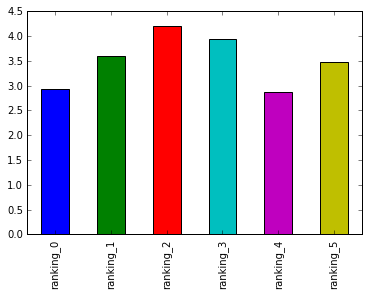

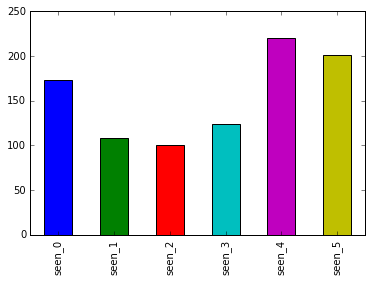

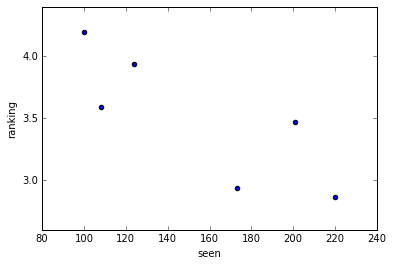

In [36]:
analyze_data(not_fans_set)

#### Trek Fans vs Non-Fans

In [37]:
trek_set = star_wars[star_wars[TREK_COL] == True]
not_trek_set = star_wars[star_wars[TREK_COL] == False]

ranking_0    3.968675
ranking_1    4.255422
ranking_2    4.403382
ranking_3    3.110843
ranking_4    2.407229
ranking_5    2.850602
dtype: float64
seen_0    364
seen_1    336
seen_2    322
seen_3    342
seen_4    397
seen_5    396
dtype: int64
   seen   ranking
0   364  3.968675
1   336  4.255422
2   322  4.403382
3   342  3.110843
4   397  2.407229
5   396  2.850602


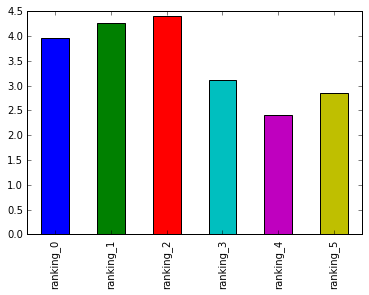

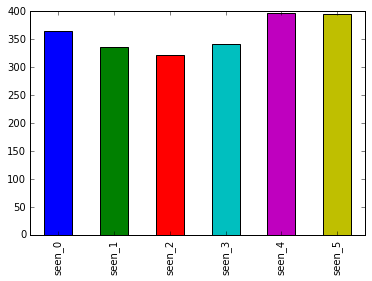

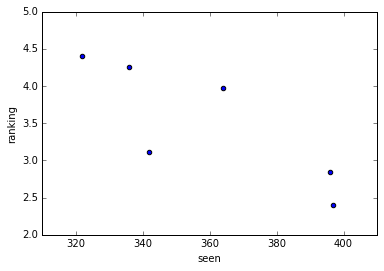

In [38]:
analyze_data(trek_set)

ranking_0    3.487864
ranking_1    3.915254
ranking_2    4.278450
ranking_3    3.433414
ranking_4    2.634383
ranking_5    3.244552
dtype: float64
seen_0    301
seen_1    228
seen_2    221
seen_3    258
seen_4    353
seen_5    334
dtype: int64
   seen   ranking
0   301  3.487864
1   228  3.915254
2   221  4.278450
3   258  3.433414
4   353  2.634383
5   334  3.244552


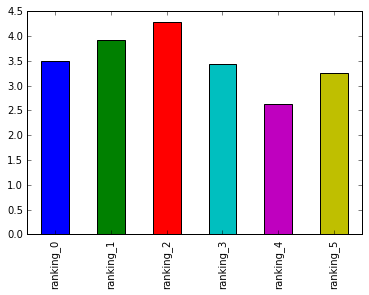

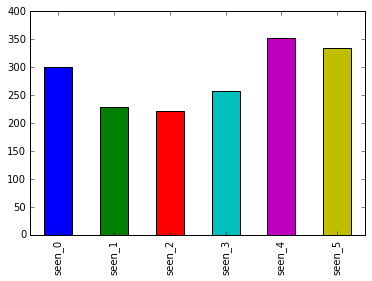

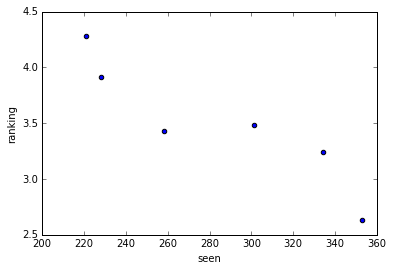

In [39]:
analyze_data(not_trek_set)